<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Chapter-3" data-toc-modified-id="Chapter-3-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Chapter 3</a></span></li></ul></div>

## Chapter 3

In [110]:
import networkx as nx
import nxviz as vz
import matplotlib.pyplot as plt

T = nx.read_gpickle('ego-twitter.p')
T_sub = T.subgraph(list(T.nodes())[:48])
T_sub_und = nx.to_undirected(T_sub)

In [35]:
from itertools import combinations

# Define is_in_triangle()
def is_in_triangle(G, n):
    """
    Checks whether a node `n` in graph `G` is in a triangle relationship or not.

    Returns a boolean.
    """
    in_triangle = False

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if an edge exists between n1 and n2
        if G.has_edge(n1, n2):
            in_triangle = True
            break
    return in_triangle

In [61]:
from itertools import combinations

# Write a function that identifies all nodes in a triangle relationship with a given node.
def nodes_in_triangle(G, n):
    """
    Returns the nodes in a graph `G` that are involved in a triangle relationship with the node `n`.
    """
    triangle_nodes = set([n])

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if n1 and n2 have an edge between them
        if G.has_edge(n1, n2):

            # Add n1 to triangle_nodes
            triangle_nodes.add(n1)

            # Add n2 to triangle_nodes
            triangle_nodes.add(n2)

    return triangle_nodes

# Write the assertion statement
assert len(nodes_in_triangle(T_sub.to_undirected(), 1)) == 35

In [70]:
from itertools import combinations

# Define node_in_open_triangle()
def node_in_open_triangle(G, n):
    """
    Checks whether pairs of neighbors of node `n` in graph `G` are in an 'open triangle' relationship with node `n`.
    """
    in_open_triangle = False

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if n1 and n2 do NOT have an edge between them
        if not G.has_edge(n1, n2):

            in_open_triangle = True

            break

    return in_open_triangle

# Compute the number of open triangles in T
num_open_triangles = 0

# Iterate over all the nodes in T
for n in T_sub.nodes():

    # Check if the current node is in an open triangle
    if node_in_open_triangle(T_sub.to_undirected(), n):

        # Increment num_open_triangles
        num_open_triangles += 1

print('\t', num_open_triangles)

	 22


In [79]:
# Define maximal_cliques()
def maximal_cliques(G, size):
    """
    Finds all maximal cliques in graph `G` that are of size `size`.
    """
    mcs = []
    for clique in nx.find_cliques(G):
        if len(list(clique)) == size:
            mcs.append(clique)
    return mcs

# Check that there are 33 maximal cliques of size 3 in the graph T
assert len(maximal_cliques(T_sub_und, 3)) == 33

In [76]:
maximal_cliques(T_sub_und, 3)

[[1, 13, 19],
 [1, 16, 48],
 [1, 19, 8],
 [1, 19, 11],
 [1, 19, 15],
 [1, 19, 48],
 [1, 19, 17],
 [1, 19, 20],
 [1, 19, 21],
 [1, 19, 30],
 [1, 19, 31],
 [1, 28, 7],
 [1, 28, 8],
 [1, 28, 11],
 [1, 28, 44],
 [1, 28, 14],
 [1, 28, 15],
 [1, 28, 48],
 [1, 28, 17],
 [1, 28, 49],
 [1, 28, 20],
 [1, 28, 21],
 [1, 28, 25],
 [1, 28, 27],
 [1, 28, 29],
 [1, 28, 30],
 [1, 28, 31],
 [1, 33, 39],
 [1, 38, 39],
 [1, 39, 40],
 [1, 43, 48],
 [1, 43, 29],
 [1, 43, 47]]

In [80]:
G = nx.erdos_renyi_graph(n=20, p=0.2)
G.nodes()

/Users/Brian/anaconda3/envs/datacamp_intro_to_networks/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


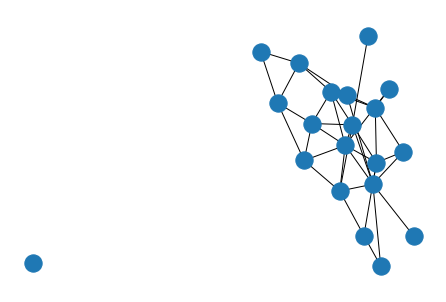

In [82]:
nx.draw(G)
plt.show()

/Users/Brian/anaconda3/envs/datacamp_intro_to_networks/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


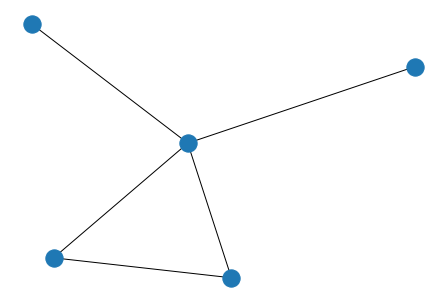

In [100]:
nodes = list(G.neighbors(8))
nodes.append(8)
G_eight = G.subgraph(nodes)
nx.draw(G_eight)
plt.show()

/Users/Brian/anaconda3/envs/datacamp_intro_to_networks/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


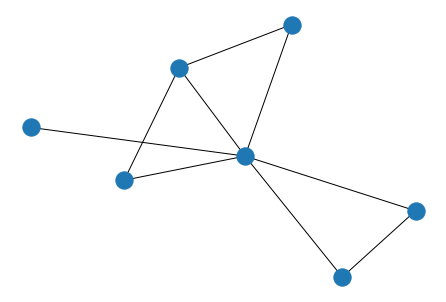

In [111]:
nodes_of_interest = [29, 38, 42]

# Define get_nodes_and_nbrs()
def get_nodes_and_nbrs(G, nodes_of_interest):
    """
    Returns a subgraph of the graph `G` with only the `nodes_of_interest` and their neighbors.
    """
    nodes_to_draw = []

    # Iterate over the nodes of interest
    for n in nodes_of_interest:

        # Append the nodes of interest to nodes_to_draw
        nodes_to_draw.append(n)

        # Iterate over all the neighbors of node n
        for nbr in G.neighbors(n):

            # Append the neighbors of n to nodes_to_draw
            nodes_to_draw.append(nbr)

    return G.subgraph(nodes_to_draw)

# Extract the subgraph with the nodes of interest: T_draw
T_draw = get_nodes_and_nbrs(nx.to_undirected(T_sub), nodes_of_interest)

# Draw the subgraph to the screen
nx.draw(T_draw)
plt.show()

/Users/Brian/anaconda3/envs/datacamp_intro_to_networks/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


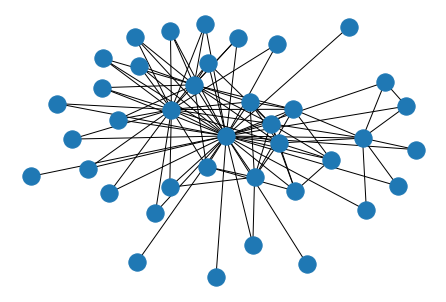

In [112]:
T_ex = nx.to_undirected(T_sub)

# Extract the nodes of interest: nodes
nodes = [n for n, d in T_ex.nodes(data=True) if d['occupation'] == 'celebrity']

# Create the set of nodes: nodeset
nodeset = set(nodes)

# Iterate over nodes
for n in nodes:

    # Compute the neighbors of n: nbrs
    nbrs = T_ex.neighbors(n)

    # Compute the union of nodeset and nbrs: nodeset
    nodeset = nodeset.union(nbrs)

# Compute the subgraph using nodeset: T_sub
T_sub_sub = T_ex.subgraph(nodeset)

# Draw T_sub to the screen
nx.draw(T_sub_sub)
plt.show()
